# Week 6 Lab: Unsupervised Learning

<img align="right" style="padding-right:10px;" src="figures_wk6/kmeans.png" width=300><br>

This week's assignment will focus completeing a K-Means analysis.

## Our Dataset: 
**Dataset:** wine_fraud.csv(Provided in folder assign_wk6)

Remember to take a look at the wine.names files for a better understanding of the dataset. You can also read more about the dataset [here](https://archive.ics.uci.edu/ml/datasets/wine).


## Unsupervised Learning

**Objective:** 
   - Use K-Means for this analysis: State and defend all your assumptions about the dataset. Defend yourself!!!
       * Make sure you cleanup your data, including the readability of your dataset
       * EDA!!!  Explore your data!
       * Categorical vs numeric columns in your dataset
       * Would normalizing your dataset help? 
   - Cluster the wines to see if there are some natural groupings
   - Use PCA to plot the clusters
   - Discover any insights from this analysis? (include numbers/graphs corresponding to your reasoning)
       * Summarize your findings.
       * What does the PCA plot tell you about your clustering?


### Deliverables:

Upload your notebook's .ipynb file (This assignment can be done in one or two notebooks. The choice it up to you!) 
   
**Important:** Make sure your provide complete and thorough explanations for all of your analysis. You need to defend your thought processes and reasoning.

Load the data using pandas

In [2]:
### Importing all necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
#  Load the dataset
df = pd.read_csv('C:/Users/balar/Downloads/assign_wk6/assign_wk6/wine_fraud.csv')
df.head(10)


,v0,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
5,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
6,1,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290
7,1,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295
8,1,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045
9,1,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045


In [6]:
df.tail(10)

,v0,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13
168,3,13.58,2.58,2.69,24.5,105,1.55,0.84,0.39,1.54,8.660000,0.74,1.80,750
169,3,13.40,4.60,2.86,25.0,112,1.98,0.96,0.27,1.11,8.500000,0.67,1.92,630
170,3,12.20,3.03,2.32,19.0,96,1.25,0.49,0.40,0.73,5.500000,0.66,1.83,510
171,3,12.77,2.39,2.28,19.5,86,1.39,0.51,0.48,0.64,9.899999,0.57,1.63,470
172,3,14.16,2.51,2.48,20.0,91,1.68,0.70,0.44,1.24,9.700000,0.62,1.71,660
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.700000,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.300000,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.200000,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.300000,0.60,1.62,840
177,3,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.200000,0.61,1.60,560


Data Cleaning


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   v0      178 non-null    int64  
 1   v1      178 non-null    float64
 2   v2      178 non-null    float64
 3   v3      178 non-null    float64
 4   v4      178 non-null    float64
 5   v5      178 non-null    int64  
 6   v6      178 non-null    float64
 7   v7      178 non-null    float64
 8   v8      178 non-null    float64
 9   v9      178 non-null    float64
 10  v10     178 non-null    float64
 11  v11     178 non-null    float64
 12  v12     178 non-null    float64
 13  v13     178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
v0,178.0,1.938202,0.775035,1.00,1.0000,2.000,3.0000,3.00
v1,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
v2,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
v3,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
v4,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
v5,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
v6,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
v7,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
v8,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
v9,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58


We can see no missing values and all are numericals

In [11]:
df.count()

v0     178
v1     178
v2     178
v3     178
v4     178
v5     178
v6     178
v7     178
v8     178
v9     178
v10    178
v11    178
v12    178
v13    178
dtype: int64

In [12]:
### Data Normalization
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

Normalize the data using StandardScaler to prepare it for clustering, which helps in treating all features equally.

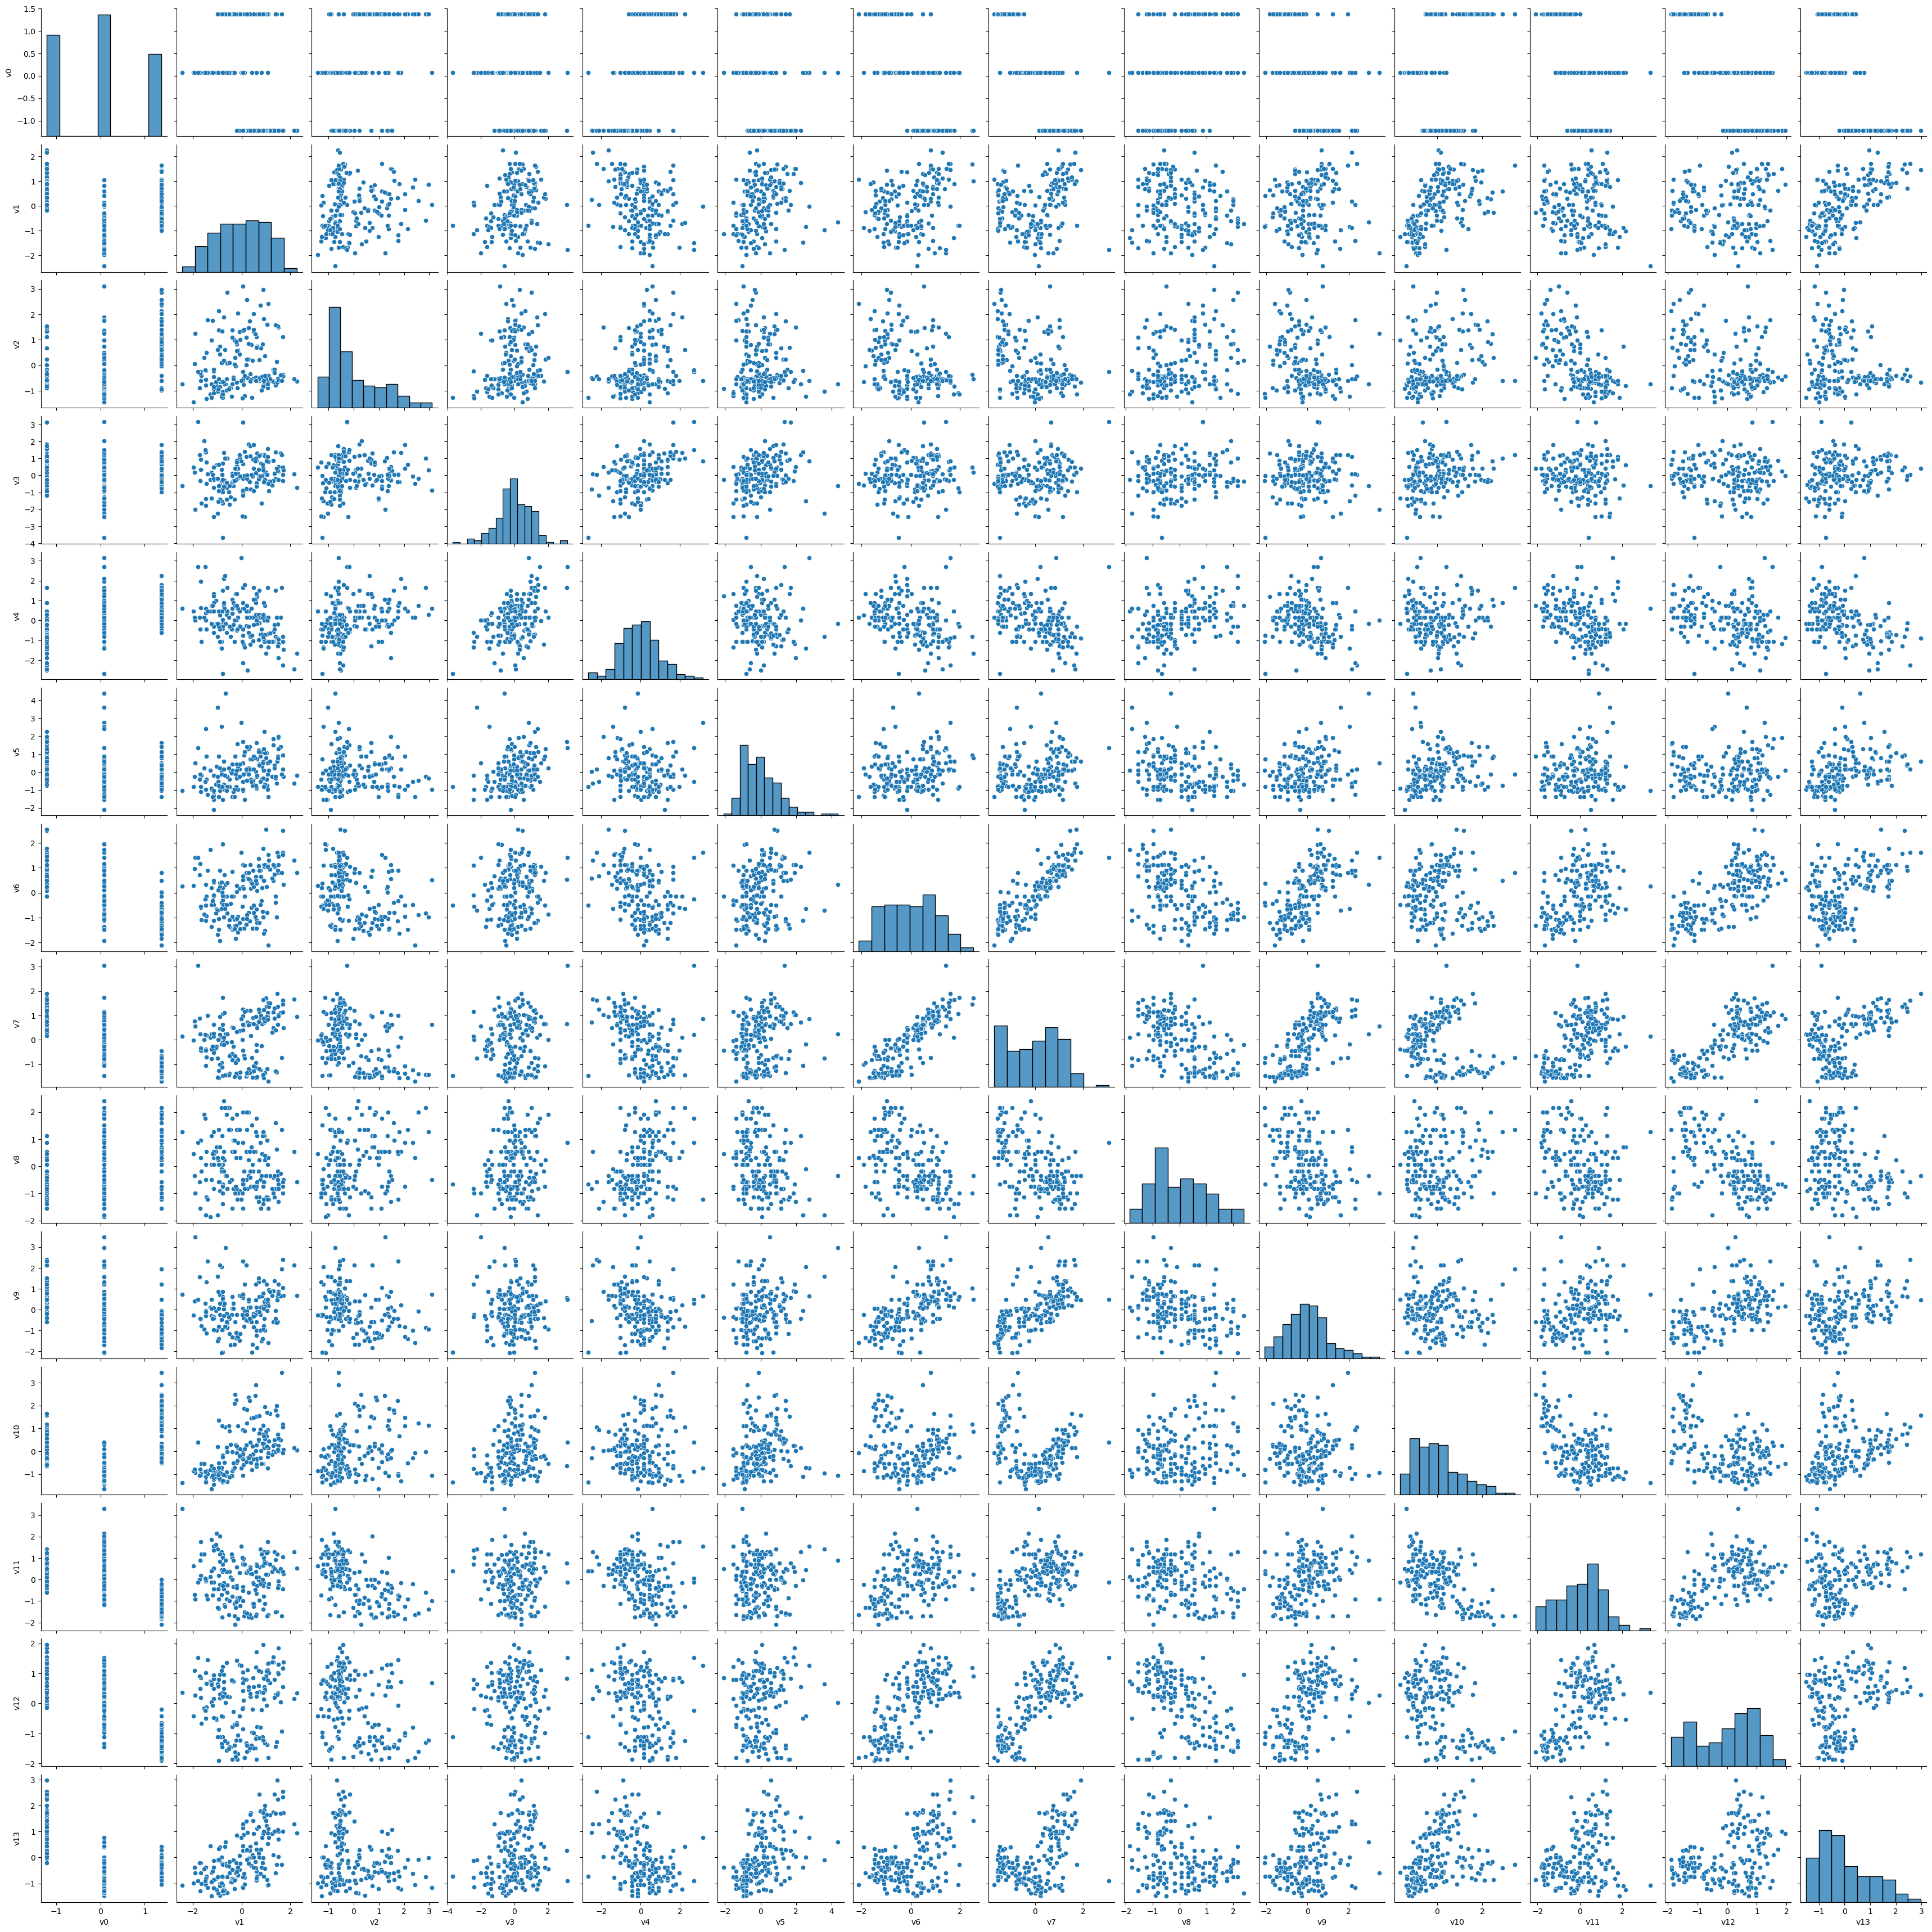

In [15]:
import warnings
### Exploratory Data Analysis (EDA)
### Plotting pairplot to visualize pairwise relationships
sns.pairplot(pd.DataFrame(df_scaled, columns=df.columns))
plt.show()

warnings.filterwarnings("ignore", category=UserWarning)


Perform EDA using seaborn's pairplot to visually inspect the relationships between features.

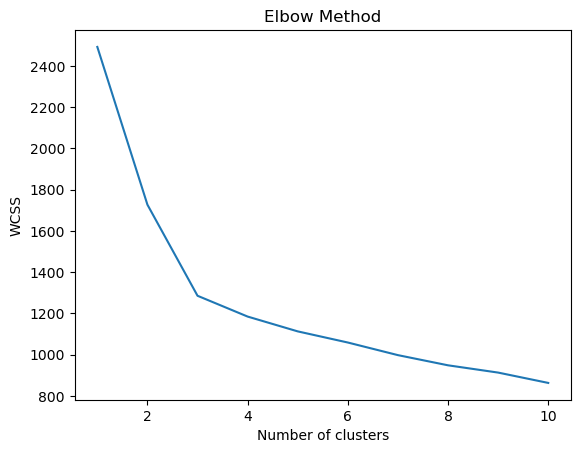

In [16]:
# Optimal Number of Clusters (Elbow Method)
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

 Use the elbow method to find the optimal number of clusters. The plot shows where the within-cluster sum of squares (WCSS) starts to level off, indicating the appropriate cluster count. (From the graph the point of variation can find at 3)

In [17]:
# K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=0)
clusters = kmeans.fit_predict(df_scaled)


Apply K-Means clustering with the identified number of clusters.

In [18]:
#  PCA for Visualization
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)


Use PCA to reduce dimensionality for a clear visualization of the clusters in a 2D plot.

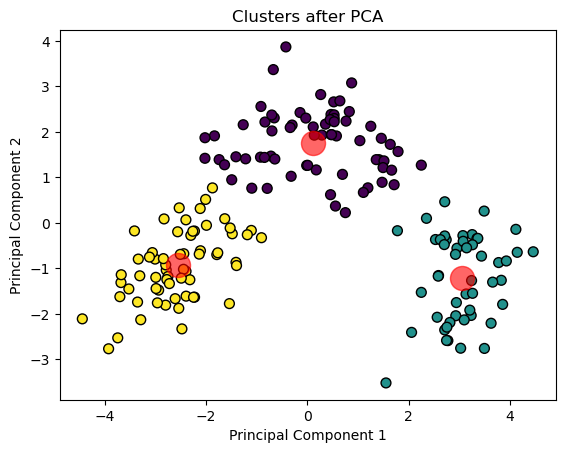

In [19]:
# Plotting clusters after PCA
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=clusters, cmap='viridis', edgecolor='k', s=50)
centers = pca.transform(kmeans.cluster_centers_)
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=300, alpha=0.6)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clusters after PCA')
plt.show()

Visualize the cluster after PCA

In [20]:
# Step 8: Insights and Summary
print("Cluster centers:", kmeans.cluster_centers_)
print("PCA Components:", pca.components_)
print("Explained variance by component:", pca.explained_variance_ratio_)

Cluster centers: [[ 7.99603601e-02 -9.09328403e-01 -3.80707476e-01 -5.19747426e-01
   1.37767008e-01 -4.97451451e-01 -9.62003532e-02 -7.65223671e-04
  -4.11471063e-03  1.12388425e-02 -8.81229129e-01  4.32636626e-01
   2.30777949e-01 -7.63273163e-01]
 [ 1.34745816e+00  1.86543138e-01  9.04971453e-01  2.49210264e-01
   5.83703484e-01 -5.06353947e-02 -9.88556997e-01 -1.23619475e+00
   7.16841717e-01 -7.49607560e-01  9.88498285e-01 -1.19129878e+00
  -1.30153966e+00 -3.80044610e-01]
 [-1.15133539e+00  8.35232085e-01 -3.03809683e-01  3.64706042e-01
  -6.10191294e-01  5.77586799e-01  8.85237363e-01  9.77819557e-01
  -5.62089654e-01  5.80286581e-01  1.71063479e-01  4.73983650e-01
   7.79247107e-01  1.12518529e+00]]
PCA Components: [[ 0.39366953 -0.13632501  0.22267638 -0.00225793  0.22429849 -0.12463016
  -0.35926404 -0.39071171  0.2670012  -0.2790625   0.08931829 -0.27682265
  -0.35052618 -0.26951525]
 [-0.00569041 -0.48416087 -0.22359095 -0.31585588  0.01161574 -0.30055143
  -0.06711983  0.0



## Insights and Summary

##### Cluster Centers:
These are the average values for each feature within a cluster. If a number is negative, it means that feature is less common in that cluster compared to the average; if it's positive, it's more common.

##### PCA Components:
PCA finds the main directions where the data varies the most. The first direction is where there is the most variation, and the second is the next most.                                                                                              
First component (PC1) shows where most of the differences among wines come from, based on their features.                     
Second component (PC2) shows the next set of differences that are not captured by the first.                          

##### Explained Variance:
This tells us how much of the total data variation is shown in each component. The first component shows about 40%, and the second shows about 18%. Together, they show about 58% of the total differences among the wines.

##### Conclusion:
The PCA helps us see the main ways wines differ using fewer features. The clusters from K-Means show us groups of similar wines. Together, they help us understand the main types of wines in the dataset and how they differ from each other.